### Libraries

In [31]:
%env CUDA_VISIBLE_DEVICES=4,5

env: CUDA_VISIBLE_DEVICES=4,5


In [32]:
import os
import sys

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# (Optional) If you're working inside Jupyter
%load_ext autoreload
%autoreload 2
%matplotlib inline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [34]:
from data_processor_v2 import DataProcessorUpdated

processor = DataProcessorUpdated()

In [35]:
processor.load_and_clean_data()

2023-12-31 23:00:00


/ephnvme/weiliang/synthesis-data/energy-prediction/pytorch/data_processor_v2.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_col] = pd.to_datetime(df[time_col])


2024-01-01 23:00:00
2023-12-31 23:00:00
2023-12-31 23:00:00


In [36]:
processor.combine_all_data()

In [37]:
processor.df

,DAP_SystemLambda,SCED_system_lambda,Fuel_coal_and_lignite,Fuel_hydro,Fuel_nuclear,Fuel_power_storage,Fuel_solar,Fuel_wind,Fuel_natural_gas,Fuel_other,Load_load,delta_price
2019-01-01 00:00:00,NaN,13.837562,6116.419040,185.465296,3895.951940,0.0,0.0,14311.36445,12512.80815,2.534772,36951.0,NaN
2019-01-01 01:00:00,NaN,15.464869,6423.242360,186.667008,3894.973176,0.0,0.0,14298.52586,12434.13638,2.947464,37112.0,NaN
2019-01-01 02:00:00,NaN,15.487720,6309.280752,187.408832,3894.733152,0.0,0.0,14030.82875,12797.25831,-1.954544,37154.0,NaN
2019-01-01 03:00:00,NaN,15.770092,6416.671292,187.817564,3894.714576,0.0,0.0,13610.13937,13279.01803,1.887324,37283.0,NaN
2019-01-01 04:00:00,NaN,16.036085,6569.580884,186.990116,3892.748912,0.0,0.0,13414.14969,13585.26799,-0.201100,37817.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 19:00:00,23.1651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 20:00:00,23.2113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 21:00:00,21.3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 22:00:00,20.3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
processor.shift_dap()

In [39]:
processor.df

,DAP_SystemLambda,SCED_system_lambda,Fuel_coal_and_lignite,Fuel_hydro,Fuel_nuclear,Fuel_power_storage,Fuel_solar,Fuel_wind,Fuel_natural_gas,Fuel_other,Load_load,delta_price
2019-01-01 00:00:00,23.9250,13.837562,6116.419040,185.465296,3895.951940,0.0,0.0,14311.36445,12512.80815,2.534772,36951.0,NaN
2019-01-01 01:00:00,23.3140,15.464869,6423.242360,186.667008,3894.973176,0.0,0.0,14298.52586,12434.13638,2.947464,37112.0,NaN
2019-01-01 02:00:00,23.3475,15.487720,6309.280752,187.408832,3894.733152,0.0,0.0,14030.82875,12797.25831,-1.954544,37154.0,NaN
2019-01-01 03:00:00,23.0595,15.770092,6416.671292,187.817564,3894.714576,0.0,0.0,13610.13937,13279.01803,1.887324,37283.0,NaN
2019-01-01 04:00:00,25.2672,16.036085,6569.580884,186.990116,3892.748912,0.0,0.0,13414.14969,13585.26799,-0.201100,37817.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
processor.split_data(feature_columns=['DAP_SystemLambda', 'SCED_system_lambda'])

In [41]:
processor.standardize_data()

In [42]:
processor.shift_data()

In [43]:
x_train_mlp, x_val_mlp, x_test_mlp, y_train_mlp, y_val_mlp, y_test_mlp = processor.flatten()

In [44]:
x_train_mlp.shape

(26089, 336)

In [45]:
y_train_mlp.shape

(26089, 24)

In [46]:
len(x_train_mlp[1])

336

# Model Building

In [67]:
from MLP import MLPModel

new_model = MLPModel(
    input_shape=len(x_train_mlp[1]),    # 5 features
    output_shape=len(y_train_mlp[1]),   # 1 price per time step
    hidden_layers=[256, 256, 256,256]  # or [256, 256]
)

mlp_model = new_model.get_model()
mlp_model.to(device)


MLPModel(
  (model): Sequential(
    (0): Linear(in_features=336, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=24, bias=True)
  )
)

In [68]:
from ModelTrainer import ModelTrainer
from losses import fluctuation_loss  # or define it above in your notebook

trainer = ModelTrainer(
    model=mlp_model,
    features_training_data=x_train_mlp,
    target_training_data=y_train_mlp,
    features_eval_data=x_val_mlp,
    target_eval_data=y_val_mlp,
    device=device,
    loss_fn=lambda pred, target: fluctuation_loss(pred, target, alpha=0.133)
)


trainer.train(epochs=100, batch_size=32, patience=50, learning_rate= 0.001)


Epoch 1: Train Loss = 0.8973, Eval Loss = 0.2441
Epoch 2: Train Loss = 0.7201, Eval Loss = 0.2412
Epoch 3: Train Loss = 0.6010, Eval Loss = 0.2398
Epoch 4: Train Loss = 0.5786, Eval Loss = 0.2430
Epoch 5: Train Loss = 0.6067, Eval Loss = 0.2397
Epoch 6: Train Loss = 0.5832, Eval Loss = 0.2421
Epoch 7: Train Loss = 0.5108, Eval Loss = 0.2431
Epoch 8: Train Loss = 0.5079, Eval Loss = 0.2437
Epoch 9: Train Loss = 0.4854, Eval Loss = 0.2450
Epoch 10: Train Loss = 0.4539, Eval Loss = 0.2430
Epoch 11: Train Loss = 0.4449, Eval Loss = 0.2415
Epoch 12: Train Loss = 0.4416, Eval Loss = 0.2408
Epoch 13: Train Loss = 0.4458, Eval Loss = 0.2452
Epoch 14: Train Loss = 0.4099, Eval Loss = 0.2440
Epoch 15: Train Loss = 0.4188, Eval Loss = 0.2376
Epoch 16: Train Loss = 0.4091, Eval Loss = 0.2403
Epoch 17: Train Loss = 0.4026, Eval Loss = 0.2427
Epoch 18: Train Loss = 0.3905, Eval Loss = 0.2435
Epoch 19: Train Loss = 0.3819, Eval Loss = 0.2445
Epoch 20: Train Loss = 0.3632, Eval Loss = 0.2409
Epoch 21:

In [69]:
loss_2 = trainer.history
with open('MLP_Worst.csv', 'w') as f:
    pd.DataFrame(loss_2).to_csv(f, index=False)

In [71]:

# predict

mlp_model.eval()
with torch.no_grad():
    y_pred = mlp_model(torch.tensor(x_test_mlp, dtype=torch.float32).to(device))


y_pred = y_pred.cpu().numpy()
errors = y_pred - y_test_mlp  # assuming y_test is numpy array
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))


# 1. Flatten both (remove batch and window dimensions if needed)
y_pred_flat = y_pred.reshape(-1)
y_test_flat = y_test_mlp.reshape(-1)

# 2. Denormalize both using your processor's function
y_pred_real = processor.denormalization(y_pred_flat)
y_test_real = processor.denormalization(y_test_flat)

from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test_real, y_pred_real)
mse = np.mean((y_test_real - y_pred_real) ** 2)
variance = np.var(y_test_real)
smse = mse / variance

print(f"MAE: {mae:.4f}, SMSE: {smse:.4f}")

MAE: 37.7043, SMSE: 0.9812


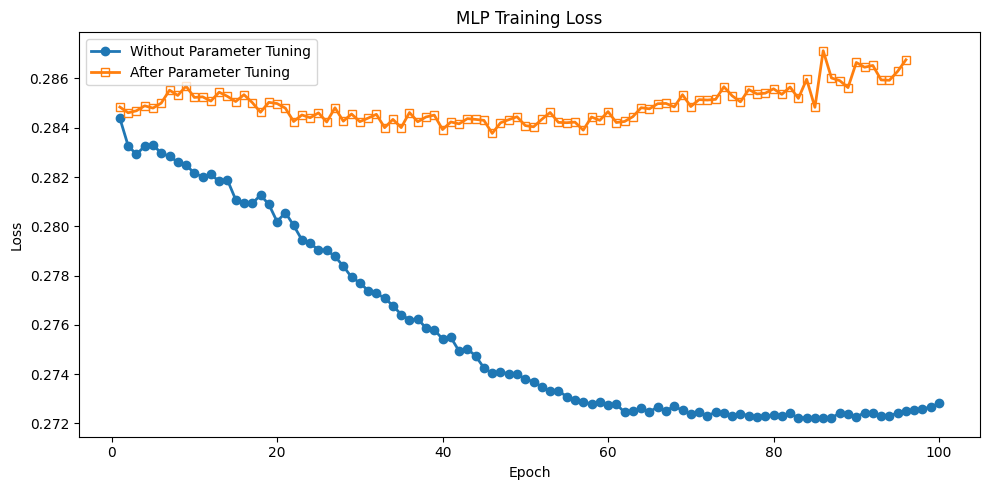

In [ ]:
df = pd.read_csv('MLP_Best.csv')
loss = df['eval_loss'].tolist()

loss_2 = trainer.history
with open('MLP_Worst.csv', 'w') as f:
    pd.DataFrame(loss_2).to_csv(f, index=False)

import matplotlib.pyplot as plt

def plot_loss_curves(
    history1, 
    history2, 
    label1='Train Loss 1', 
    label2='Train Loss 2',
    figsize=(8, 6),
    fmt1='-',
    fmt2='-',
    title='Training Loss Curves',
    xlabel='Epoch',
    ylabel='Loss',
    plot_kwargs1=None,
    plot_kwargs2=None
):
    """
    Plots two training loss curves on the same figure with adjustable format and size.

    Parameters:
    - history1: dict with key 'train_loss' containing loss values per epoch
    - history2: dict with key 'train_loss' containing loss values per epoch
    - label1: label for the first loss curve
    - label2: label for the second loss curve
    - figsize: tuple specifying figure size (width, height) in inches
    - fmt1: format string for the first curve (e.g. '-', '--', 'o-')
    - fmt2: format string for the second curve
    - title: title of the plot
    - xlabel: label for the x-axis
    - ylabel: label for the y-axis
    - plot_kwargs1: dict of additional keyword arguments for the first plt.plot call
    - plot_kwargs2: dict of additional keyword arguments for the second plt.plot call
    """
    plot_kwargs1 = plot_kwargs1 or {}
    plot_kwargs2 = plot_kwargs2 or {}

    epochs1 = range(1, len(history1) + 1)
    epochs2 = range(1, len(history2) + 1)

    plt.figure(figsize=figsize)
    plt.plot(epochs1, history1, fmt1, label=label1, **plot_kwargs1)
    plt.plot(epochs2, history2, fmt2, label=label2, **plot_kwargs2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_loss_curves(
    loss, 
    loss_2, 
    label1='Without Parameter Tuning', 
    label2='After Parameter Tuning',
    figsize=(10, 5),
    fmt1='-o',
    fmt2='-s',
    title='MLP Training Loss',
    plot_kwargs1={'linewidth':2},
    plot_kwargs2={'linewidth':2, 'markerfacecolor':'none'}
)


In [71]:
import optuna
from MLP import MLPModel
from ModelTrainer import ModelTrainer
from losses import fluctuation_loss

def objective(trial):
    # Suggest hyperparameters
    hidden_dim = trial.suggest_categorical("hidden_dim", [128, 256, 512])
    n_layers = trial.suggest_int("n_layers", 2, 4)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
    alpha = trial.suggest_uniform("alpha", 0.1, 0.5)

    # Build hidden layers
    hidden_layers = [hidden_dim] * n_layers

    # Build model
    model = MLPModel(input_shape=len(x_train_mlp[1]), output_shape=len(y_train_mlp[1]), hidden_layers=hidden_layers).get_model().to(device)

    # Trainer
    trainer = ModelTrainer(
        model=model,
        features_training_data=x_train_mlp,
        target_training_data=y_train_mlp,
        features_eval_data=x_val_mlp,
        target_eval_data=y_val_mlp,
        device=device,
        loss_fn=lambda pred, target: fluctuation_loss(pred, target, alpha=alpha)
    )

    # Train for a few epochs
    trainer.train(epochs=50, batch_size=32, patience=10, learning_rate=lr)

    # Return final eval loss (or early stopping best)
    return trainer.history['eval_loss'][-1]


In [40]:

study = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.HyperbandPruner()
)
study.optimize(objective, n_trials=50)


[I 2025-05-11 03:27:28,155] A new study created in memory with name: no-name-17c2a3e8-cce5-4992-ba32-383d6574a8a2


/ephnvme/weiliang/cache/tmpdir/ipykernel_4054947/1319189539.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
/ephnvme/weiliang/cache/tmpdir/ipykernel_4054947/1319189539.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform("alpha", 0.1, 0.5)


Epoch 1: Train Loss = 0.7915, Eval Loss = 0.2956
Epoch 2: Train Loss = 0.6538, Eval Loss = 0.2941
Epoch 3: Train Loss = 0.6367, Eval Loss = 0.2920
Epoch 4: Train Loss = 0.6199, Eval Loss = 0.2931
Epoch 5: Train Loss = 0.6098, Eval Loss = 0.2907
Epoch 6: Train Loss = 0.5982, Eval Loss = 0.2894
Epoch 7: Train Loss = 0.5809, Eval Loss = 0.2879
Epoch 8: Train Loss = 0.5561, Eval Loss = 0.2867
Epoch 9: Train Loss = 0.5317, Eval Loss = 0.2849
Epoch 10: Train Loss = 0.5053, Eval Loss = 0.2852
Epoch 11: Train Loss = 0.4822, Eval Loss = 0.2840
Epoch 12: Train Loss = 0.4616, Eval Loss = 0.2846
Epoch 13: Train Loss = 0.4406, Eval Loss = 0.2844
Epoch 14: Train Loss = 0.4235, Eval Loss = 0.2836
Epoch 15: Train Loss = 0.4103, Eval Loss = 0.2834
Epoch 16: Train Loss = 0.3875, Eval Loss = 0.2830
Epoch 17: Train Loss = 0.3834, Eval Loss = 0.2833
Epoch 18: Train Loss = 0.3749, Eval Loss = 0.2846
Epoch 19: Train Loss = 0.3706, Eval Loss = 0.2851
Epoch 20: Train Loss = 0.3681, Eval Loss = 0.2850
Epoch 21:

[I 2025-05-11 03:28:27,356] Trial 0 finished with value: 0.2882169187068939 and parameters: {'hidden_dim': 128, 'n_layers': 4, 'lr': 0.00016287499695007422, 'alpha': 0.4054719478439285}. Best is trial 0 with value: 0.2882169187068939.


Epoch 26: Train Loss = 0.3412, Eval Loss = 0.2882
Early stopping triggered at epoch 26
Epoch 1: Train Loss = 1.0502, Eval Loss = 0.2890
Epoch 2: Train Loss = 0.8330, Eval Loss = 0.2866
Epoch 3: Train Loss = 0.7250, Eval Loss = 0.2856
Epoch 4: Train Loss = 0.6771, Eval Loss = 0.2859
Epoch 5: Train Loss = 0.6681, Eval Loss = 0.2853
Epoch 6: Train Loss = 0.6259, Eval Loss = 0.2855
Epoch 7: Train Loss = 0.6093, Eval Loss = 0.2855
Epoch 8: Train Loss = 0.5981, Eval Loss = 0.2848
Epoch 9: Train Loss = 0.5869, Eval Loss = 0.2849
Epoch 10: Train Loss = 0.5763, Eval Loss = 0.2849
Epoch 11: Train Loss = 0.5674, Eval Loss = 0.2845
Epoch 12: Train Loss = 0.5582, Eval Loss = 0.2837
Epoch 13: Train Loss = 0.5501, Eval Loss = 0.2835
Epoch 14: Train Loss = 0.5422, Eval Loss = 0.2832
Epoch 15: Train Loss = 0.5329, Eval Loss = 0.2829
Epoch 16: Train Loss = 0.5267, Eval Loss = 0.2826
Epoch 17: Train Loss = 0.5194, Eval Loss = 0.2823
Epoch 18: Train Loss = 0.5113, Eval Loss = 0.2823
Epoch 19: Train Loss =

[I 2025-05-11 03:29:54,127] Trial 1 finished with value: 0.282134085893631 and parameters: {'hidden_dim': 512, 'n_layers': 2, 'lr': 1.210530981218894e-05, 'alpha': 0.38457813283897857}. Best is trial 1 with value: 0.282134085893631.


Epoch 35: Train Loss = 0.4144, Eval Loss = 0.2821
Early stopping triggered at epoch 35
Epoch 1: Train Loss = 0.8146, Eval Loss = 0.3039
Epoch 2: Train Loss = 0.7186, Eval Loss = 0.3010
Epoch 3: Train Loss = 0.7052, Eval Loss = 0.3002
Epoch 4: Train Loss = 0.6701, Eval Loss = 0.2999
Epoch 5: Train Loss = 0.6761, Eval Loss = 0.3017
Epoch 6: Train Loss = 0.6525, Eval Loss = 0.3028
Epoch 7: Train Loss = 0.6107, Eval Loss = 0.3083
Epoch 8: Train Loss = 0.6041, Eval Loss = 0.3087
Epoch 9: Train Loss = 0.5698, Eval Loss = 0.3071
Epoch 10: Train Loss = 0.5655, Eval Loss = 0.3089
Epoch 11: Train Loss = 0.5486, Eval Loss = 0.3073
Epoch 12: Train Loss = 0.5111, Eval Loss = 0.3099
Epoch 13: Train Loss = 0.5046, Eval Loss = 0.3097


[I 2025-05-11 03:30:25,846] Trial 2 finished with value: 0.3071444630622864 and parameters: {'hidden_dim': 128, 'n_layers': 4, 'lr': 0.0005800169261252493, 'alpha': 0.4989992300998197}. Best is trial 1 with value: 0.282134085893631.


Epoch 14: Train Loss = 0.4948, Eval Loss = 0.3071
Early stopping triggered at epoch 14
Epoch 1: Train Loss = 0.6423, Eval Loss = 0.2430
Epoch 2: Train Loss = 0.5103, Eval Loss = 0.2396
Epoch 3: Train Loss = 0.4713, Eval Loss = 0.2341
Epoch 4: Train Loss = 0.4271, Eval Loss = 0.2347
Epoch 5: Train Loss = 0.3735, Eval Loss = 0.2331
Epoch 6: Train Loss = 0.3368, Eval Loss = 0.2324
Epoch 7: Train Loss = 0.2983, Eval Loss = 0.2318
Epoch 8: Train Loss = 0.2751, Eval Loss = 0.2314
Epoch 9: Train Loss = 0.2654, Eval Loss = 0.2316
Epoch 10: Train Loss = 0.2560, Eval Loss = 0.2307
Epoch 11: Train Loss = 0.2535, Eval Loss = 0.2303
Epoch 12: Train Loss = 0.2391, Eval Loss = 0.2331
Epoch 13: Train Loss = 0.2284, Eval Loss = 0.2331
Epoch 14: Train Loss = 0.2263, Eval Loss = 0.2339
Epoch 15: Train Loss = 0.2299, Eval Loss = 0.2339
Epoch 16: Train Loss = 0.2210, Eval Loss = 0.2353
Epoch 17: Train Loss = 0.2100, Eval Loss = 0.2368
Epoch 18: Train Loss = 0.2080, Eval Loss = 0.2381
Epoch 19: Train Loss =

[I 2025-05-11 03:31:35,965] Trial 3 finished with value: 0.24059619009494781 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 9.623680283957342e-05, 'alpha': 0.1066092381769956}. Best is trial 3 with value: 0.24059619009494781.


Epoch 21: Train Loss = 0.1948, Eval Loss = 0.2406
Early stopping triggered at epoch 21
Epoch 1: Train Loss = 0.9345, Eval Loss = 0.2553
Epoch 2: Train Loss = 0.6636, Eval Loss = 0.2538
Epoch 3: Train Loss = 0.5786, Eval Loss = 0.2536
Epoch 4: Train Loss = 0.5463, Eval Loss = 0.2547
Epoch 5: Train Loss = 0.5272, Eval Loss = 0.2548
Epoch 6: Train Loss = 0.5143, Eval Loss = 0.2536
Epoch 7: Train Loss = 0.5027, Eval Loss = 0.2535
Epoch 8: Train Loss = 0.4913, Eval Loss = 0.2532
Epoch 9: Train Loss = 0.4810, Eval Loss = 0.2523
Epoch 10: Train Loss = 0.4711, Eval Loss = 0.2519
Epoch 11: Train Loss = 0.4603, Eval Loss = 0.2512
Epoch 12: Train Loss = 0.4481, Eval Loss = 0.2504
Epoch 13: Train Loss = 0.4380, Eval Loss = 0.2488
Epoch 14: Train Loss = 0.4265, Eval Loss = 0.2494
Epoch 15: Train Loss = 0.4164, Eval Loss = 0.2484
Epoch 16: Train Loss = 0.4081, Eval Loss = 0.2485
Epoch 17: Train Loss = 0.3978, Eval Loss = 0.2474
Epoch 18: Train Loss = 0.3897, Eval Loss = 0.2474
Epoch 19: Train Loss =

[I 2025-05-11 03:34:05,657] Trial 4 finished with value: 0.24665459990501404 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 1.2385076070749562e-05, 'alpha': 0.168840537424991}. Best is trial 3 with value: 0.24059619009494781.


Epoch 38: Train Loss = 0.2799, Eval Loss = 0.2467
Early stopping triggered at epoch 38
Epoch 1: Train Loss = 0.9461, Eval Loss = 0.2800
Epoch 2: Train Loss = 0.6612, Eval Loss = 0.2797
Epoch 3: Train Loss = 0.6086, Eval Loss = 0.2793
Epoch 4: Train Loss = 0.5887, Eval Loss = 0.2784
Epoch 5: Train Loss = 0.5756, Eval Loss = 0.2782
Epoch 6: Train Loss = 0.5601, Eval Loss = 0.2772
Epoch 7: Train Loss = 0.5463, Eval Loss = 0.2756
Epoch 8: Train Loss = 0.5305, Eval Loss = 0.2743
Epoch 9: Train Loss = 0.5104, Eval Loss = 0.2733
Epoch 10: Train Loss = 0.4941, Eval Loss = 0.2728
Epoch 11: Train Loss = 0.4750, Eval Loss = 0.2718
Epoch 12: Train Loss = 0.4618, Eval Loss = 0.2716
Epoch 13: Train Loss = 0.4460, Eval Loss = 0.2711
Epoch 14: Train Loss = 0.4340, Eval Loss = 0.2708
Epoch 15: Train Loss = 0.4363, Eval Loss = 0.2707
Epoch 16: Train Loss = 0.4097, Eval Loss = 0.2706
Epoch 17: Train Loss = 0.3977, Eval Loss = 0.2706
Epoch 18: Train Loss = 0.3869, Eval Loss = 0.2703
Epoch 19: Train Loss =

[I 2025-05-11 03:36:05,739] Trial 5 finished with value: 0.2710748612880707 and parameters: {'hidden_dim': 256, 'n_layers': 3, 'lr': 4.269476391407439e-05, 'alpha': 0.31903545171002334}. Best is trial 3 with value: 0.24059619009494781.


Epoch 44: Train Loss = 0.2781, Eval Loss = 0.2711
Early stopping triggered at epoch 44
Epoch 1: Train Loss = 0.9645, Eval Loss = 0.2929
Epoch 2: Train Loss = 0.7012, Eval Loss = 0.2949
Epoch 3: Train Loss = 0.6438, Eval Loss = 0.2941
Epoch 4: Train Loss = 0.6249, Eval Loss = 0.2936
Epoch 5: Train Loss = 0.6051, Eval Loss = 0.2921
Epoch 6: Train Loss = 0.5915, Eval Loss = 0.2906
Epoch 7: Train Loss = 0.5731, Eval Loss = 0.2893
Epoch 8: Train Loss = 0.5567, Eval Loss = 0.2892
Epoch 9: Train Loss = 0.5389, Eval Loss = 0.2880
Epoch 10: Train Loss = 0.5183, Eval Loss = 0.2873
Epoch 11: Train Loss = 0.5061, Eval Loss = 0.2862
Epoch 12: Train Loss = 0.4910, Eval Loss = 0.2855
Epoch 13: Train Loss = 0.4778, Eval Loss = 0.2858
Epoch 14: Train Loss = 0.4623, Eval Loss = 0.2849
Epoch 15: Train Loss = 0.4531, Eval Loss = 0.2845
Epoch 16: Train Loss = 0.4417, Eval Loss = 0.2844
Epoch 17: Train Loss = 0.4310, Eval Loss = 0.2847
Epoch 18: Train Loss = 0.4187, Eval Loss = 0.2849
Epoch 19: Train Loss =

[I 2025-05-11 03:39:15,488] Trial 6 finished with value: 0.28289419412612915 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 2.318354166719222e-05, 'alpha': 0.4018182652144753}. Best is trial 3 with value: 0.24059619009494781.


Epoch 48: Train Loss = 0.2710, Eval Loss = 0.2829
Early stopping triggered at epoch 48
Epoch 1: Train Loss = 0.7664, Eval Loss = 0.2754
Epoch 2: Train Loss = 0.6072, Eval Loss = 0.2730
Epoch 3: Train Loss = 0.5703, Eval Loss = 0.2711
Epoch 4: Train Loss = 0.5411, Eval Loss = 0.2671
Epoch 5: Train Loss = 0.5013, Eval Loss = 0.2667
Epoch 6: Train Loss = 0.4635, Eval Loss = 0.2654
Epoch 7: Train Loss = 0.4291, Eval Loss = 0.2643
Epoch 8: Train Loss = 0.4037, Eval Loss = 0.2651
Epoch 9: Train Loss = 0.3783, Eval Loss = 0.2645
Epoch 10: Train Loss = 0.3598, Eval Loss = 0.2640
Epoch 11: Train Loss = 0.3427, Eval Loss = 0.2639
Epoch 12: Train Loss = 0.3315, Eval Loss = 0.2639
Epoch 13: Train Loss = 0.3219, Eval Loss = 0.2643
Epoch 14: Train Loss = 0.3136, Eval Loss = 0.2635
Epoch 15: Train Loss = 0.3063, Eval Loss = 0.2633
Epoch 16: Train Loss = 0.2999, Eval Loss = 0.2629
Epoch 17: Train Loss = 0.2977, Eval Loss = 0.2635
Epoch 18: Train Loss = 0.2895, Eval Loss = 0.2638
Epoch 19: Train Loss =

[I 2025-05-11 03:41:01,699] Trial 7 finished with value: 0.26867035031318665 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 6.04214410565616e-05, 'alpha': 0.29814249995711684}. Best is trial 3 with value: 0.24059619009494781.


Epoch 26: Train Loss = 0.2470, Eval Loss = 0.2687
Early stopping triggered at epoch 26
Epoch 1: Train Loss = 0.8451, Eval Loss = 0.2784
Epoch 2: Train Loss = 0.6254, Eval Loss = 0.2776
Epoch 3: Train Loss = 0.5890, Eval Loss = 0.2760
Epoch 4: Train Loss = 0.5697, Eval Loss = 0.2744
Epoch 5: Train Loss = 0.5362, Eval Loss = 0.2716
Epoch 6: Train Loss = 0.5087, Eval Loss = 0.2697
Epoch 7: Train Loss = 0.4789, Eval Loss = 0.2695
Epoch 8: Train Loss = 0.4572, Eval Loss = 0.2684
Epoch 9: Train Loss = 0.4337, Eval Loss = 0.2680
Epoch 10: Train Loss = 0.4134, Eval Loss = 0.2677
Epoch 11: Train Loss = 0.3979, Eval Loss = 0.2679
Epoch 12: Train Loss = 0.3828, Eval Loss = 0.2674
Epoch 13: Train Loss = 0.3691, Eval Loss = 0.2673
Epoch 14: Train Loss = 0.3548, Eval Loss = 0.2670
Epoch 15: Train Loss = 0.3435, Eval Loss = 0.2673
Epoch 16: Train Loss = 0.3348, Eval Loss = 0.2674
Epoch 17: Train Loss = 0.3264, Eval Loss = 0.2674
Epoch 18: Train Loss = 0.3204, Eval Loss = 0.2669
Epoch 19: Train Loss =

[I 2025-05-11 03:43:23,744] Trial 8 finished with value: 0.2693879306316376 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 4.1666369394759935e-05, 'alpha': 0.31745822915817806}. Best is trial 3 with value: 0.24059619009494781.


Epoch 35: Train Loss = 0.2292, Eval Loss = 0.2694
Early stopping triggered at epoch 35
Epoch 1: Train Loss = 1.0391, Eval Loss = 0.2647
Epoch 2: Train Loss = 0.8297, Eval Loss = 0.2614
Epoch 3: Train Loss = 0.6971, Eval Loss = 0.2613
Epoch 4: Train Loss = 0.6333, Eval Loss = 0.2613
Epoch 5: Train Loss = 0.6001, Eval Loss = 0.2608
Epoch 6: Train Loss = 0.5780, Eval Loss = 0.2614
Epoch 7: Train Loss = 0.5627, Eval Loss = 0.2612
Epoch 8: Train Loss = 0.5505, Eval Loss = 0.2604
Epoch 9: Train Loss = 0.5391, Eval Loss = 0.2606
Epoch 10: Train Loss = 0.5310, Eval Loss = 0.2599
Epoch 11: Train Loss = 0.5237, Eval Loss = 0.2592
Epoch 12: Train Loss = 0.5261, Eval Loss = 0.2589
Epoch 13: Train Loss = 0.5096, Eval Loss = 0.2587
Epoch 14: Train Loss = 0.5022, Eval Loss = 0.2585
Epoch 15: Train Loss = 0.4951, Eval Loss = 0.2583
Epoch 16: Train Loss = 0.4901, Eval Loss = 0.2579
Epoch 17: Train Loss = 0.4821, Eval Loss = 0.2574
Epoch 18: Train Loss = 0.4762, Eval Loss = 0.2570
Epoch 19: Train Loss =

[I 2025-05-11 03:44:27,092] Trial 9 finished with value: 0.2556040287017822 and parameters: {'hidden_dim': 128, 'n_layers': 2, 'lr': 2.6593255918279533e-05, 'alpha': 0.2146111996975223}. Best is trial 3 with value: 0.24059619009494781.


Epoch 41: Train Loss = 0.3618, Eval Loss = 0.2556
Early stopping triggered at epoch 41
Epoch 1: Train Loss = 0.6302, Eval Loss = 0.2438
Epoch 2: Train Loss = 0.5120, Eval Loss = 0.2387
Epoch 3: Train Loss = 0.4701, Eval Loss = 0.2356
Epoch 4: Train Loss = 0.4182, Eval Loss = 0.2347
Epoch 5: Train Loss = 0.3744, Eval Loss = 0.2345
Epoch 6: Train Loss = 0.3364, Eval Loss = 0.2341
Epoch 7: Train Loss = 0.3048, Eval Loss = 0.2341
Epoch 8: Train Loss = 0.2793, Eval Loss = 0.2338
Epoch 9: Train Loss = 0.2678, Eval Loss = 0.2356
Epoch 10: Train Loss = 0.2595, Eval Loss = 0.2359
Epoch 11: Train Loss = 0.2432, Eval Loss = 0.2357
Epoch 12: Train Loss = 0.2353, Eval Loss = 0.2371
Epoch 13: Train Loss = 0.2304, Eval Loss = 0.2371
Epoch 14: Train Loss = 0.2273, Eval Loss = 0.2385
Epoch 15: Train Loss = 0.2273, Eval Loss = 0.2387
Epoch 16: Train Loss = 0.2150, Eval Loss = 0.2395
Epoch 17: Train Loss = 0.2090, Eval Loss = 0.2403


[I 2025-05-11 03:45:01,982] Trial 10 finished with value: 0.24077589809894562 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.0001904842503461363, 'alpha': 0.10178606215320835}. Best is trial 3 with value: 0.24059619009494781.


Epoch 18: Train Loss = 0.2086, Eval Loss = 0.2408
Early stopping triggered at epoch 18
Epoch 1: Train Loss = 0.6363, Eval Loss = 0.2409
Epoch 2: Train Loss = 0.5019, Eval Loss = 0.2387
Epoch 3: Train Loss = 0.4605, Eval Loss = 0.2359
Epoch 4: Train Loss = 0.4183, Eval Loss = 0.2347
Epoch 5: Train Loss = 0.3851, Eval Loss = 0.2338
Epoch 6: Train Loss = 0.3330, Eval Loss = 0.2342
Epoch 7: Train Loss = 0.3041, Eval Loss = 0.2335
Epoch 8: Train Loss = 0.2779, Eval Loss = 0.2341
Epoch 9: Train Loss = 0.2650, Eval Loss = 0.2334
Epoch 10: Train Loss = 0.2504, Eval Loss = 0.2342
Epoch 11: Train Loss = 0.2538, Eval Loss = 0.2338
Epoch 12: Train Loss = 0.2382, Eval Loss = 0.2342
Epoch 13: Train Loss = 0.2279, Eval Loss = 0.2349
Epoch 14: Train Loss = 0.2282, Eval Loss = 0.2365
Epoch 15: Train Loss = 0.2233, Eval Loss = 0.2363
Epoch 16: Train Loss = 0.2129, Eval Loss = 0.2367
Epoch 17: Train Loss = 0.2124, Eval Loss = 0.2373
Epoch 18: Train Loss = 0.2029, Eval Loss = 0.2385


[I 2025-05-11 03:45:39,396] Trial 11 finished with value: 0.23932461440563202 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00019053191108844402, 'alpha': 0.10118860885829964}. Best is trial 11 with value: 0.23932461440563202.


Epoch 19: Train Loss = 0.1982, Eval Loss = 0.2393
Early stopping triggered at epoch 19
Epoch 1: Train Loss = 0.6028, Eval Loss = 0.2404
Epoch 2: Train Loss = 0.5120, Eval Loss = 0.2373
Epoch 3: Train Loss = 0.4682, Eval Loss = 0.2346
Epoch 4: Train Loss = 0.4063, Eval Loss = 0.2346
Epoch 5: Train Loss = 0.3488, Eval Loss = 0.2346
Epoch 6: Train Loss = 0.3201, Eval Loss = 0.2340
Epoch 7: Train Loss = 0.2871, Eval Loss = 0.2348
Epoch 8: Train Loss = 0.2680, Eval Loss = 0.2350
Epoch 9: Train Loss = 0.2532, Eval Loss = 0.2357
Epoch 10: Train Loss = 0.2557, Eval Loss = 0.2375
Epoch 11: Train Loss = 0.2373, Eval Loss = 0.2390
Epoch 12: Train Loss = 0.2414, Eval Loss = 0.2408
Epoch 13: Train Loss = 0.2440, Eval Loss = 0.2410
Epoch 14: Train Loss = 0.2206, Eval Loss = 0.2408
Epoch 15: Train Loss = 0.2196, Eval Loss = 0.2411


[I 2025-05-11 03:46:10,259] Trial 12 finished with value: 0.24254155158996582 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00039297723844301027, 'alpha': 0.10563362594467132}. Best is trial 11 with value: 0.23932461440563202.


Epoch 16: Train Loss = 0.2065, Eval Loss = 0.2425
Early stopping triggered at epoch 16
Epoch 1: Train Loss = 0.6788, Eval Loss = 0.2572
Epoch 2: Train Loss = 0.5630, Eval Loss = 0.2552
Epoch 3: Train Loss = 0.5332, Eval Loss = 0.2546
Epoch 4: Train Loss = 0.5171, Eval Loss = 0.2510
Epoch 5: Train Loss = 0.4967, Eval Loss = 0.2498
Epoch 6: Train Loss = 0.4705, Eval Loss = 0.2487
Epoch 7: Train Loss = 0.4384, Eval Loss = 0.2484
Epoch 8: Train Loss = 0.3991, Eval Loss = 0.2483
Epoch 9: Train Loss = 0.3657, Eval Loss = 0.2472
Epoch 10: Train Loss = 0.3400, Eval Loss = 0.2473
Epoch 11: Train Loss = 0.3162, Eval Loss = 0.2478
Epoch 12: Train Loss = 0.3041, Eval Loss = 0.2474
Epoch 13: Train Loss = 0.2938, Eval Loss = 0.2494
Epoch 14: Train Loss = 0.2886, Eval Loss = 0.2499
Epoch 15: Train Loss = 0.2846, Eval Loss = 0.2505
Epoch 16: Train Loss = 0.2766, Eval Loss = 0.2515
Epoch 17: Train Loss = 0.2700, Eval Loss = 0.2532
Epoch 18: Train Loss = 0.2635, Eval Loss = 0.2546


[I 2025-05-11 03:47:13,972] Trial 13 finished with value: 0.256275475025177 and parameters: {'hidden_dim': 256, 'n_layers': 4, 'lr': 0.00011764929934405094, 'alpha': 0.18551688306552772}. Best is trial 11 with value: 0.23932461440563202.


Epoch 19: Train Loss = 0.2663, Eval Loss = 0.2563
Early stopping triggered at epoch 19
Epoch 1: Train Loss = 0.6995, Eval Loss = 0.2623
Epoch 2: Train Loss = 0.5791, Eval Loss = 0.2599
Epoch 3: Train Loss = 0.5410, Eval Loss = 0.2576
Epoch 4: Train Loss = 0.4897, Eval Loss = 0.2550
Epoch 5: Train Loss = 0.4475, Eval Loss = 0.2562
Epoch 6: Train Loss = 0.3878, Eval Loss = 0.2557
Epoch 7: Train Loss = 0.3574, Eval Loss = 0.2566
Epoch 8: Train Loss = 0.3327, Eval Loss = 0.2570
Epoch 9: Train Loss = 0.3285, Eval Loss = 0.2571
Epoch 10: Train Loss = 0.3098, Eval Loss = 0.2592
Epoch 11: Train Loss = 0.2962, Eval Loss = 0.2598
Epoch 12: Train Loss = 0.2917, Eval Loss = 0.2599
Epoch 13: Train Loss = 0.2887, Eval Loss = 0.2621


[I 2025-05-11 03:47:42,208] Trial 14 finished with value: 0.2611980736255646 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.0002886066473416056, 'alpha': 0.24341091947463792}. Best is trial 11 with value: 0.23932461440563202.


Epoch 14: Train Loss = 0.2753, Eval Loss = 0.2612
Early stopping triggered at epoch 14
Epoch 1: Train Loss = 0.7110, Eval Loss = 0.2443
Epoch 2: Train Loss = 0.6843, Eval Loss = 0.2475
Epoch 3: Train Loss = 0.5618, Eval Loss = 0.2438
Epoch 4: Train Loss = 0.5289, Eval Loss = 0.2468
Epoch 5: Train Loss = 0.4884, Eval Loss = 0.2471
Epoch 6: Train Loss = 0.4880, Eval Loss = 0.2470
Epoch 7: Train Loss = 0.4313, Eval Loss = 0.2458
Epoch 8: Train Loss = 0.4085, Eval Loss = 0.2468
Epoch 9: Train Loss = 0.3799, Eval Loss = 0.2483
Epoch 10: Train Loss = 0.3339, Eval Loss = 0.2487
Epoch 11: Train Loss = 0.3275, Eval Loss = 0.2478
Epoch 12: Train Loss = 0.2932, Eval Loss = 0.2480


[I 2025-05-11 03:48:14,443] Trial 15 finished with value: 0.2500613331794739 and parameters: {'hidden_dim': 512, 'n_layers': 2, 'lr': 0.0008734618084313882, 'alpha': 0.14677944693206488}. Best is trial 11 with value: 0.23932461440563202.


Epoch 13: Train Loss = 0.2771, Eval Loss = 0.2501
Early stopping triggered at epoch 13
Epoch 1: Train Loss = 0.7961, Eval Loss = 0.2703
Epoch 2: Train Loss = 0.5858, Eval Loss = 0.2682
Epoch 3: Train Loss = 0.5690, Eval Loss = 0.2672
Epoch 4: Train Loss = 0.5504, Eval Loss = 0.2662
Epoch 5: Train Loss = 0.5444, Eval Loss = 0.2664
Epoch 6: Train Loss = 0.5251, Eval Loss = 0.2644
Epoch 7: Train Loss = 0.4988, Eval Loss = 0.2615
Epoch 8: Train Loss = 0.4669, Eval Loss = 0.2610
Epoch 9: Train Loss = 0.4341, Eval Loss = 0.2585
Epoch 10: Train Loss = 0.4023, Eval Loss = 0.2579
Epoch 11: Train Loss = 0.3806, Eval Loss = 0.2575
Epoch 12: Train Loss = 0.3656, Eval Loss = 0.2583
Epoch 13: Train Loss = 0.3474, Eval Loss = 0.2583
Epoch 14: Train Loss = 0.3343, Eval Loss = 0.2582
Epoch 15: Train Loss = 0.3220, Eval Loss = 0.2575
Epoch 16: Train Loss = 0.3203, Eval Loss = 0.2578
Epoch 17: Train Loss = 0.3085, Eval Loss = 0.2577
Epoch 18: Train Loss = 0.3044, Eval Loss = 0.2589
Epoch 19: Train Loss =

[I 2025-05-11 03:49:40,076] Trial 16 finished with value: 0.2610337734222412 and parameters: {'hidden_dim': 256, 'n_layers': 4, 'lr': 8.201978690992264e-05, 'alpha': 0.25116297346216043}. Best is trial 11 with value: 0.23932461440563202.


Epoch 25: Train Loss = 0.2802, Eval Loss = 0.2610
Early stopping triggered at epoch 25
Epoch 1: Train Loss = 0.6384, Eval Loss = 0.2428
Epoch 2: Train Loss = 0.5529, Eval Loss = 0.2422
Epoch 3: Train Loss = 0.5120, Eval Loss = 0.2388
Epoch 4: Train Loss = 0.4731, Eval Loss = 0.2401
Epoch 5: Train Loss = 0.4121, Eval Loss = 0.2407
Epoch 6: Train Loss = 0.3919, Eval Loss = 0.2420
Epoch 7: Train Loss = 0.3382, Eval Loss = 0.2423
Epoch 8: Train Loss = 0.3640, Eval Loss = 0.2450
Epoch 9: Train Loss = 0.3092, Eval Loss = 0.2461
Epoch 10: Train Loss = 0.2967, Eval Loss = 0.2452
Epoch 11: Train Loss = 0.2728, Eval Loss = 0.2448
Epoch 12: Train Loss = 0.2864, Eval Loss = 0.2482


[I 2025-05-11 03:50:25,080] Trial 17 finished with value: 0.24769815802574158 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 0.00025614170690773817, 'alpha': 0.13738980884207208}. Best is trial 11 with value: 0.23932461440563202.


Epoch 13: Train Loss = 0.2657, Eval Loss = 0.2477
Early stopping triggered at epoch 13
Epoch 1: Train Loss = 0.7308, Eval Loss = 0.2599
Epoch 2: Train Loss = 0.5639, Eval Loss = 0.2575
Epoch 3: Train Loss = 0.5327, Eval Loss = 0.2556
Epoch 4: Train Loss = 0.5119, Eval Loss = 0.2521
Epoch 5: Train Loss = 0.4678, Eval Loss = 0.2506
Epoch 6: Train Loss = 0.4361, Eval Loss = 0.2502
Epoch 7: Train Loss = 0.3956, Eval Loss = 0.2500
Epoch 8: Train Loss = 0.3753, Eval Loss = 0.2484
Epoch 9: Train Loss = 0.3529, Eval Loss = 0.2488
Epoch 10: Train Loss = 0.3304, Eval Loss = 0.2487
Epoch 11: Train Loss = 0.3106, Eval Loss = 0.2489
Epoch 12: Train Loss = 0.3066, Eval Loss = 0.2476
Epoch 13: Train Loss = 0.2946, Eval Loss = 0.2482
Epoch 14: Train Loss = 0.2834, Eval Loss = 0.2485
Epoch 15: Train Loss = 0.2777, Eval Loss = 0.2491
Epoch 16: Train Loss = 0.2723, Eval Loss = 0.2498
Epoch 17: Train Loss = 0.2656, Eval Loss = 0.2497
Epoch 18: Train Loss = 0.2674, Eval Loss = 0.2494
Epoch 19: Train Loss =

[I 2025-05-11 03:51:22,481] Trial 18 finished with value: 0.2526605725288391 and parameters: {'hidden_dim': 256, 'n_layers': 3, 'lr': 0.00011396698329289136, 'alpha': 0.1979622404159901}. Best is trial 11 with value: 0.23932461440563202.


Epoch 22: Train Loss = 0.2492, Eval Loss = 0.2527
Early stopping triggered at epoch 22
Epoch 1: Train Loss = 0.7936, Eval Loss = 0.2498
Epoch 2: Train Loss = 0.5735, Eval Loss = 0.2484
Epoch 3: Train Loss = 0.5313, Eval Loss = 0.2486
Epoch 4: Train Loss = 0.5114, Eval Loss = 0.2476
Epoch 5: Train Loss = 0.4921, Eval Loss = 0.2461
Epoch 6: Train Loss = 0.4765, Eval Loss = 0.2451
Epoch 7: Train Loss = 0.4582, Eval Loss = 0.2445
Epoch 8: Train Loss = 0.4402, Eval Loss = 0.2436
Epoch 9: Train Loss = 0.4232, Eval Loss = 0.2429
Epoch 10: Train Loss = 0.4085, Eval Loss = 0.2424
Epoch 11: Train Loss = 0.3915, Eval Loss = 0.2415
Epoch 12: Train Loss = 0.3781, Eval Loss = 0.2420
Epoch 13: Train Loss = 0.3633, Eval Loss = 0.2421
Epoch 14: Train Loss = 0.3520, Eval Loss = 0.2419
Epoch 15: Train Loss = 0.3399, Eval Loss = 0.2421
Epoch 16: Train Loss = 0.3303, Eval Loss = 0.2425
Epoch 17: Train Loss = 0.3216, Eval Loss = 0.2421
Epoch 18: Train Loss = 0.3113, Eval Loss = 0.2427
Epoch 19: Train Loss =

[I 2025-05-11 03:51:54,306] Trial 19 finished with value: 0.2425321787595749 and parameters: {'hidden_dim': 128, 'n_layers': 2, 'lr': 7.376244360103121e-05, 'alpha': 0.1383248056458412}. Best is trial 11 with value: 0.23932461440563202.


Epoch 21: Train Loss = 0.2934, Eval Loss = 0.2425
Early stopping triggered at epoch 21
Epoch 1: Train Loss = 0.7721, Eval Loss = 0.2649
Epoch 2: Train Loss = 0.6287, Eval Loss = 0.2623
Epoch 3: Train Loss = 0.5894, Eval Loss = 0.2619
Epoch 4: Train Loss = 0.6154, Eval Loss = 0.2641
Epoch 5: Train Loss = 0.5281, Eval Loss = 0.2637
Epoch 6: Train Loss = 0.5494, Eval Loss = 0.2678
Epoch 7: Train Loss = 0.4861, Eval Loss = 0.2646
Epoch 8: Train Loss = 0.4658, Eval Loss = 0.2683
Epoch 9: Train Loss = 0.4259, Eval Loss = 0.2659
Epoch 10: Train Loss = 0.4533, Eval Loss = 0.2658
Epoch 11: Train Loss = 0.3711, Eval Loss = 0.2625
Epoch 12: Train Loss = 0.3373, Eval Loss = 0.2661


[I 2025-05-11 03:52:39,165] Trial 20 finished with value: 0.26608991622924805 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 0.0004742797493097238, 'alpha': 0.26047476343115045}. Best is trial 11 with value: 0.23932461440563202.


Epoch 13: Train Loss = 0.3459, Eval Loss = 0.2661
Early stopping triggered at epoch 13
Epoch 1: Train Loss = 0.6332, Eval Loss = 0.2418
Epoch 2: Train Loss = 0.5150, Eval Loss = 0.2391
Epoch 3: Train Loss = 0.4666, Eval Loss = 0.2364
Epoch 4: Train Loss = 0.4188, Eval Loss = 0.2348
Epoch 5: Train Loss = 0.3651, Eval Loss = 0.2347
Epoch 6: Train Loss = 0.3408, Eval Loss = 0.2344
Epoch 7: Train Loss = 0.3021, Eval Loss = 0.2345
Epoch 8: Train Loss = 0.2847, Eval Loss = 0.2342
Epoch 9: Train Loss = 0.2681, Eval Loss = 0.2357
Epoch 10: Train Loss = 0.2539, Eval Loss = 0.2351
Epoch 11: Train Loss = 0.2537, Eval Loss = 0.2362
Epoch 12: Train Loss = 0.2519, Eval Loss = 0.2363
Epoch 13: Train Loss = 0.2346, Eval Loss = 0.2379
Epoch 14: Train Loss = 0.2299, Eval Loss = 0.2381
Epoch 15: Train Loss = 0.2259, Eval Loss = 0.2380
Epoch 16: Train Loss = 0.2174, Eval Loss = 0.2395
Epoch 17: Train Loss = 0.2127, Eval Loss = 0.2396


[I 2025-05-11 03:53:13,973] Trial 21 finished with value: 0.23996113240718842 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00019833429502005785, 'alpha': 0.1084746896255454}. Best is trial 11 with value: 0.23932461440563202.


Epoch 18: Train Loss = 0.2123, Eval Loss = 0.2400
Early stopping triggered at epoch 18
Epoch 1: Train Loss = 0.6507, Eval Loss = 0.2441
Epoch 2: Train Loss = 0.5273, Eval Loss = 0.2398
Epoch 3: Train Loss = 0.4700, Eval Loss = 0.2376
Epoch 4: Train Loss = 0.4161, Eval Loss = 0.2365
Epoch 5: Train Loss = 0.3784, Eval Loss = 0.2365
Epoch 6: Train Loss = 0.3415, Eval Loss = 0.2339
Epoch 7: Train Loss = 0.3084, Eval Loss = 0.2348
Epoch 8: Train Loss = 0.2883, Eval Loss = 0.2349
Epoch 9: Train Loss = 0.2706, Eval Loss = 0.2349
Epoch 10: Train Loss = 0.2569, Eval Loss = 0.2352
Epoch 11: Train Loss = 0.2661, Eval Loss = 0.2348
Epoch 12: Train Loss = 0.2381, Eval Loss = 0.2354
Epoch 13: Train Loss = 0.2312, Eval Loss = 0.2363
Epoch 14: Train Loss = 0.2326, Eval Loss = 0.2378
Epoch 15: Train Loss = 0.2300, Eval Loss = 0.2375


[I 2025-05-11 03:53:42,996] Trial 22 finished with value: 0.23827916383743286 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.0001711630829256663, 'alpha': 0.10491783304004444}. Best is trial 22 with value: 0.23827916383743286.


Epoch 16: Train Loss = 0.2177, Eval Loss = 0.2383
Early stopping triggered at epoch 16
Epoch 1: Train Loss = 0.6653, Eval Loss = 0.2517
Epoch 2: Train Loss = 0.5349, Eval Loss = 0.2476
Epoch 3: Train Loss = 0.4941, Eval Loss = 0.2457
Epoch 4: Train Loss = 0.4410, Eval Loss = 0.2443
Epoch 5: Train Loss = 0.3948, Eval Loss = 0.2431
Epoch 6: Train Loss = 0.3651, Eval Loss = 0.2431
Epoch 7: Train Loss = 0.3307, Eval Loss = 0.2430
Epoch 8: Train Loss = 0.3033, Eval Loss = 0.2425
Epoch 9: Train Loss = 0.2919, Eval Loss = 0.2422
Epoch 10: Train Loss = 0.2737, Eval Loss = 0.2419
Epoch 11: Train Loss = 0.2672, Eval Loss = 0.2430
Epoch 12: Train Loss = 0.2631, Eval Loss = 0.2432
Epoch 13: Train Loss = 0.2575, Eval Loss = 0.2431
Epoch 14: Train Loss = 0.2469, Eval Loss = 0.2435
Epoch 15: Train Loss = 0.2403, Eval Loss = 0.2445
Epoch 16: Train Loss = 0.2351, Eval Loss = 0.2454
Epoch 17: Train Loss = 0.2317, Eval Loss = 0.2458
Epoch 18: Train Loss = 0.2257, Eval Loss = 0.2465
Epoch 19: Train Loss =

[I 2025-05-11 03:54:19,650] Trial 23 finished with value: 0.24714794754981995 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.0001920220969781183, 'alpha': 0.15869093629167383}. Best is trial 22 with value: 0.23827916383743286.


Epoch 20: Train Loss = 0.2168, Eval Loss = 0.2471
Early stopping triggered at epoch 20
Epoch 1: Train Loss = 0.6460, Eval Loss = 0.2442
Epoch 2: Train Loss = 0.5253, Eval Loss = 0.2435
Epoch 3: Train Loss = 0.4799, Eval Loss = 0.2402
Epoch 4: Train Loss = 0.4259, Eval Loss = 0.2404
Epoch 5: Train Loss = 0.3778, Eval Loss = 0.2405
Epoch 6: Train Loss = 0.3319, Eval Loss = 0.2399
Epoch 7: Train Loss = 0.3057, Eval Loss = 0.2409
Epoch 8: Train Loss = 0.2797, Eval Loss = 0.2408
Epoch 9: Train Loss = 0.2667, Eval Loss = 0.2432
Epoch 10: Train Loss = 0.2665, Eval Loss = 0.2415
Epoch 11: Train Loss = 0.2573, Eval Loss = 0.2437
Epoch 12: Train Loss = 0.2570, Eval Loss = 0.2431
Epoch 13: Train Loss = 0.2346, Eval Loss = 0.2452
Epoch 14: Train Loss = 0.2334, Eval Loss = 0.2460
Epoch 15: Train Loss = 0.2362, Eval Loss = 0.2462


[I 2025-05-11 03:54:49,255] Trial 24 finished with value: 0.24810928106307983 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.0002966881731184431, 'alpha': 0.13418792165876636}. Best is trial 22 with value: 0.23827916383743286.


Epoch 16: Train Loss = 0.2246, Eval Loss = 0.2481
Early stopping triggered at epoch 16
Epoch 1: Train Loss = 0.6963, Eval Loss = 0.2618
Epoch 2: Train Loss = 0.5548, Eval Loss = 0.2596
Epoch 3: Train Loss = 0.5212, Eval Loss = 0.2571
Epoch 4: Train Loss = 0.4697, Eval Loss = 0.2558
Epoch 5: Train Loss = 0.4343, Eval Loss = 0.2539
Epoch 6: Train Loss = 0.3972, Eval Loss = 0.2550
Epoch 7: Train Loss = 0.3676, Eval Loss = 0.2549
Epoch 8: Train Loss = 0.3364, Eval Loss = 0.2544
Epoch 9: Train Loss = 0.3221, Eval Loss = 0.2550
Epoch 10: Train Loss = 0.3102, Eval Loss = 0.2545
Epoch 11: Train Loss = 0.3084, Eval Loss = 0.2542
Epoch 12: Train Loss = 0.2894, Eval Loss = 0.2539
Epoch 13: Train Loss = 0.2872, Eval Loss = 0.2541
Epoch 14: Train Loss = 0.2750, Eval Loss = 0.2547
Epoch 15: Train Loss = 0.2682, Eval Loss = 0.2546
Epoch 16: Train Loss = 0.2647, Eval Loss = 0.2550
Epoch 17: Train Loss = 0.2589, Eval Loss = 0.2556
Epoch 18: Train Loss = 0.2558, Eval Loss = 0.2561
Epoch 19: Train Loss =

[I 2025-05-11 03:55:29,724] Trial 25 finished with value: 0.2574329078197479 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00014809321678604627, 'alpha': 0.21205916395893165}. Best is trial 22 with value: 0.23827916383743286.


Epoch 22: Train Loss = 0.2354, Eval Loss = 0.2574
Early stopping triggered at epoch 22
Epoch 1: Train Loss = 0.6292, Eval Loss = 0.2378
Epoch 2: Train Loss = 0.5323, Eval Loss = 0.2376
Epoch 3: Train Loss = 0.5095, Eval Loss = 0.2359
Epoch 4: Train Loss = 0.4540, Eval Loss = 0.2373
Epoch 5: Train Loss = 0.4405, Eval Loss = 0.2402
Epoch 6: Train Loss = 0.3741, Eval Loss = 0.2414
Epoch 7: Train Loss = 0.3261, Eval Loss = 0.2419
Epoch 8: Train Loss = 0.3035, Eval Loss = 0.2416
Epoch 9: Train Loss = 0.2731, Eval Loss = 0.2412
Epoch 10: Train Loss = 0.2694, Eval Loss = 0.2416
Epoch 11: Train Loss = 0.2636, Eval Loss = 0.2429
Epoch 12: Train Loss = 0.2455, Eval Loss = 0.2431


[I 2025-05-11 03:55:53,540] Trial 26 finished with value: 0.24311022460460663 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.0008033022971886674, 'alpha': 0.1011313502587996}. Best is trial 22 with value: 0.23827916383743286.


Epoch 13: Train Loss = 0.2324, Eval Loss = 0.2431
Early stopping triggered at epoch 13
Epoch 1: Train Loss = 0.6500, Eval Loss = 0.2516
Epoch 2: Train Loss = 0.5366, Eval Loss = 0.2477
Epoch 3: Train Loss = 0.4983, Eval Loss = 0.2449
Epoch 4: Train Loss = 0.4450, Eval Loss = 0.2447
Epoch 5: Train Loss = 0.3988, Eval Loss = 0.2432
Epoch 6: Train Loss = 0.3592, Eval Loss = 0.2421
Epoch 7: Train Loss = 0.3255, Eval Loss = 0.2429
Epoch 8: Train Loss = 0.3038, Eval Loss = 0.2429
Epoch 9: Train Loss = 0.2882, Eval Loss = 0.2426
Epoch 10: Train Loss = 0.2807, Eval Loss = 0.2424
Epoch 11: Train Loss = 0.2712, Eval Loss = 0.2427
Epoch 12: Train Loss = 0.2666, Eval Loss = 0.2434
Epoch 13: Train Loss = 0.2652, Eval Loss = 0.2430
Epoch 14: Train Loss = 0.2572, Eval Loss = 0.2434
Epoch 15: Train Loss = 0.2459, Eval Loss = 0.2436


[I 2025-05-11 03:56:23,073] Trial 27 finished with value: 0.244315966963768 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00021087973122686546, 'alpha': 0.16803727016185088}. Best is trial 22 with value: 0.23827916383743286.


Epoch 16: Train Loss = 0.2442, Eval Loss = 0.2443
Early stopping triggered at epoch 16
Epoch 1: Train Loss = 0.6530, Eval Loss = 0.2425
Epoch 2: Train Loss = 0.5173, Eval Loss = 0.2400
Epoch 3: Train Loss = 0.4705, Eval Loss = 0.2367
Epoch 4: Train Loss = 0.4187, Eval Loss = 0.2354
Epoch 5: Train Loss = 0.3764, Eval Loss = 0.2370
Epoch 6: Train Loss = 0.3363, Eval Loss = 0.2360
Epoch 7: Train Loss = 0.2938, Eval Loss = 0.2377
Epoch 8: Train Loss = 0.2872, Eval Loss = 0.2389
Epoch 9: Train Loss = 0.2753, Eval Loss = 0.2386
Epoch 10: Train Loss = 0.2581, Eval Loss = 0.2399
Epoch 11: Train Loss = 0.2716, Eval Loss = 0.2411
Epoch 12: Train Loss = 0.2443, Eval Loss = 0.2415
Epoch 13: Train Loss = 0.2431, Eval Loss = 0.2423


[I 2025-05-11 03:56:48,825] Trial 28 finished with value: 0.2425297349691391 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00037241825577504173, 'alpha': 0.1251822668202063}. Best is trial 22 with value: 0.23827916383743286.


Epoch 14: Train Loss = 0.2349, Eval Loss = 0.2425
Early stopping triggered at epoch 14
Epoch 1: Train Loss = 0.7357, Eval Loss = 0.2570
Epoch 2: Train Loss = 0.5667, Eval Loss = 0.2568
Epoch 3: Train Loss = 0.5367, Eval Loss = 0.2545
Epoch 4: Train Loss = 0.5115, Eval Loss = 0.2532
Epoch 5: Train Loss = 0.4854, Eval Loss = 0.2529
Epoch 6: Train Loss = 0.4586, Eval Loss = 0.2508
Epoch 7: Train Loss = 0.4311, Eval Loss = 0.2500
Epoch 8: Train Loss = 0.4068, Eval Loss = 0.2503
Epoch 9: Train Loss = 0.3842, Eval Loss = 0.2501
Epoch 10: Train Loss = 0.3619, Eval Loss = 0.2499
Epoch 11: Train Loss = 0.3541, Eval Loss = 0.2497
Epoch 12: Train Loss = 0.3284, Eval Loss = 0.2494
Epoch 13: Train Loss = 0.3162, Eval Loss = 0.2490
Epoch 14: Train Loss = 0.3086, Eval Loss = 0.2493
Epoch 15: Train Loss = 0.2991, Eval Loss = 0.2498
Epoch 16: Train Loss = 0.2905, Eval Loss = 0.2499
Epoch 17: Train Loss = 0.2845, Eval Loss = 0.2501
Epoch 18: Train Loss = 0.2823, Eval Loss = 0.2498
Epoch 19: Train Loss =

[I 2025-05-11 03:57:22,742] Trial 29 finished with value: 0.25052717328071594 and parameters: {'hidden_dim': 128, 'n_layers': 2, 'lr': 0.00014032397534307088, 'alpha': 0.18534531199196652}. Best is trial 22 with value: 0.23827916383743286.


Epoch 23: Train Loss = 0.2571, Eval Loss = 0.2505
Early stopping triggered at epoch 23
Epoch 1: Train Loss = 0.7282, Eval Loss = 0.2828
Epoch 2: Train Loss = 0.6408, Eval Loss = 0.2791
Epoch 3: Train Loss = 0.5903, Eval Loss = 0.2772
Epoch 4: Train Loss = 0.5459, Eval Loss = 0.2757
Epoch 5: Train Loss = 0.4957, Eval Loss = 0.2744
Epoch 6: Train Loss = 0.4460, Eval Loss = 0.2767
Epoch 7: Train Loss = 0.4137, Eval Loss = 0.2782
Epoch 8: Train Loss = 0.4100, Eval Loss = 0.2801
Epoch 9: Train Loss = 0.3846, Eval Loss = 0.2824
Epoch 10: Train Loss = 0.3800, Eval Loss = 0.2824
Epoch 11: Train Loss = 0.3682, Eval Loss = 0.2832
Epoch 12: Train Loss = 0.3497, Eval Loss = 0.2849
Epoch 13: Train Loss = 0.3336, Eval Loss = 0.2848
Epoch 14: Train Loss = 0.3299, Eval Loss = 0.2873


[I 2025-05-11 03:57:50,402] Trial 30 finished with value: 0.2903870940208435 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.000573035540806766, 'alpha': 0.3631897674920237}. Best is trial 22 with value: 0.23827916383743286.


Epoch 15: Train Loss = 0.3258, Eval Loss = 0.2904
Early stopping triggered at epoch 15
Epoch 1: Train Loss = 0.6854, Eval Loss = 0.2489
Epoch 2: Train Loss = 0.5308, Eval Loss = 0.2480
Epoch 3: Train Loss = 0.5098, Eval Loss = 0.2475
Epoch 4: Train Loss = 0.4936, Eval Loss = 0.2446
Epoch 5: Train Loss = 0.4750, Eval Loss = 0.2429
Epoch 6: Train Loss = 0.4540, Eval Loss = 0.2416
Epoch 7: Train Loss = 0.4245, Eval Loss = 0.2413
Epoch 8: Train Loss = 0.3943, Eval Loss = 0.2396
Epoch 9: Train Loss = 0.3640, Eval Loss = 0.2400
Epoch 10: Train Loss = 0.3399, Eval Loss = 0.2382
Epoch 11: Train Loss = 0.3163, Eval Loss = 0.2384
Epoch 12: Train Loss = 0.2968, Eval Loss = 0.2382
Epoch 13: Train Loss = 0.2813, Eval Loss = 0.2382
Epoch 14: Train Loss = 0.2690, Eval Loss = 0.2381
Epoch 15: Train Loss = 0.2620, Eval Loss = 0.2384
Epoch 16: Train Loss = 0.2576, Eval Loss = 0.2378
Epoch 17: Train Loss = 0.2563, Eval Loss = 0.2387
Epoch 18: Train Loss = 0.2492, Eval Loss = 0.2383
Epoch 19: Train Loss =

[I 2025-05-11 03:59:12,471] Trial 31 finished with value: 0.24235545098781586 and parameters: {'hidden_dim': 256, 'n_layers': 4, 'lr': 8.696404766354976e-05, 'alpha': 0.12235384005818346}. Best is trial 22 with value: 0.23827916383743286.


Epoch 26: Train Loss = 0.2179, Eval Loss = 0.2424
Early stopping triggered at epoch 26
Epoch 1: Train Loss = 0.8127, Eval Loss = 0.3000
Epoch 2: Train Loss = 0.6736, Eval Loss = 0.2972
Epoch 3: Train Loss = 0.6331, Eval Loss = 0.2943
Epoch 4: Train Loss = 0.5942, Eval Loss = 0.2935
Epoch 5: Train Loss = 0.5600, Eval Loss = 0.2902
Epoch 6: Train Loss = 0.5187, Eval Loss = 0.2900
Epoch 7: Train Loss = 0.4868, Eval Loss = 0.2894
Epoch 8: Train Loss = 0.4541, Eval Loss = 0.2897
Epoch 9: Train Loss = 0.4301, Eval Loss = 0.2902
Epoch 10: Train Loss = 0.4131, Eval Loss = 0.2896
Epoch 11: Train Loss = 0.3993, Eval Loss = 0.2903
Epoch 12: Train Loss = 0.3927, Eval Loss = 0.2899
Epoch 13: Train Loss = 0.3746, Eval Loss = 0.2899
Epoch 14: Train Loss = 0.3695, Eval Loss = 0.2907
Epoch 15: Train Loss = 0.3631, Eval Loss = 0.2903
Epoch 16: Train Loss = 0.3507, Eval Loss = 0.2911


[I 2025-05-11 03:59:43,899] Trial 32 finished with value: 0.2906968891620636 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 0.00015037889851878992, 'alpha': 0.4480636058569929}. Best is trial 22 with value: 0.23827916383743286.


Epoch 17: Train Loss = 0.3472, Eval Loss = 0.2907
Early stopping triggered at epoch 17
Epoch 1: Train Loss = 0.6468, Eval Loss = 0.2408
Epoch 2: Train Loss = 0.5390, Eval Loss = 0.2398
Epoch 3: Train Loss = 0.4523, Eval Loss = 0.2372
Epoch 4: Train Loss = 0.3967, Eval Loss = 0.2355
Epoch 5: Train Loss = 0.3335, Eval Loss = 0.2372
Epoch 6: Train Loss = 0.3133, Eval Loss = 0.2364
Epoch 7: Train Loss = 0.2867, Eval Loss = 0.2391
Epoch 8: Train Loss = 0.2662, Eval Loss = 0.2389
Epoch 9: Train Loss = 0.2547, Eval Loss = 0.2411
Epoch 10: Train Loss = 0.2647, Eval Loss = 0.2418
Epoch 11: Train Loss = 0.2468, Eval Loss = 0.2424
Epoch 12: Train Loss = 0.2381, Eval Loss = 0.2446
Epoch 13: Train Loss = 0.2257, Eval Loss = 0.2453


[I 2025-05-11 04:00:16,395] Trial 33 finished with value: 0.24739211797714233 and parameters: {'hidden_dim': 512, 'n_layers': 2, 'lr': 0.0002459556807965155, 'alpha': 0.11907705159016535}. Best is trial 22 with value: 0.23827916383743286.


Epoch 14: Train Loss = 0.2202, Eval Loss = 0.2474
Early stopping triggered at epoch 14
Epoch 1: Train Loss = 0.8494, Eval Loss = 0.2561
Epoch 2: Train Loss = 0.5911, Eval Loss = 0.2559
Epoch 3: Train Loss = 0.5517, Eval Loss = 0.2559
Epoch 4: Train Loss = 0.5346, Eval Loss = 0.2546
Epoch 5: Train Loss = 0.5197, Eval Loss = 0.2539
Epoch 6: Train Loss = 0.5072, Eval Loss = 0.2534
Epoch 7: Train Loss = 0.4952, Eval Loss = 0.2522
Epoch 8: Train Loss = 0.4835, Eval Loss = 0.2517
Epoch 9: Train Loss = 0.4670, Eval Loss = 0.2510
Epoch 10: Train Loss = 0.4531, Eval Loss = 0.2497
Epoch 11: Train Loss = 0.4390, Eval Loss = 0.2491
Epoch 12: Train Loss = 0.4263, Eval Loss = 0.2478
Epoch 13: Train Loss = 0.4066, Eval Loss = 0.2471
Epoch 14: Train Loss = 0.3905, Eval Loss = 0.2469
Epoch 15: Train Loss = 0.3763, Eval Loss = 0.2463
Epoch 16: Train Loss = 0.3639, Eval Loss = 0.2459
Epoch 17: Train Loss = 0.3545, Eval Loss = 0.2462
Epoch 18: Train Loss = 0.3443, Eval Loss = 0.2460
Epoch 19: Train Loss =

[I 2025-05-11 04:01:36,188] Trial 34 finished with value: 0.24577412009239197 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 5.781202919276994e-05, 'alpha': 0.17063386122033597}. Best is trial 22 with value: 0.23827916383743286.


Epoch 44: Train Loss = 0.2403, Eval Loss = 0.2458
Early stopping triggered at epoch 44
Epoch 1: Train Loss = 0.6572, Eval Loss = 0.2511
Epoch 2: Train Loss = 0.5349, Eval Loss = 0.2469
Epoch 3: Train Loss = 0.4974, Eval Loss = 0.2442
Epoch 4: Train Loss = 0.4484, Eval Loss = 0.2436
Epoch 5: Train Loss = 0.3964, Eval Loss = 0.2416
Epoch 6: Train Loss = 0.3607, Eval Loss = 0.2405
Epoch 7: Train Loss = 0.3258, Eval Loss = 0.2406
Epoch 8: Train Loss = 0.3031, Eval Loss = 0.2406
Epoch 9: Train Loss = 0.2880, Eval Loss = 0.2413
Epoch 10: Train Loss = 0.2721, Eval Loss = 0.2407
Epoch 11: Train Loss = 0.2741, Eval Loss = 0.2398
Epoch 12: Train Loss = 0.2629, Eval Loss = 0.2415
Epoch 13: Train Loss = 0.2543, Eval Loss = 0.2426
Epoch 14: Train Loss = 0.2548, Eval Loss = 0.2450
Epoch 15: Train Loss = 0.2407, Eval Loss = 0.2447
Epoch 16: Train Loss = 0.2385, Eval Loss = 0.2466
Epoch 17: Train Loss = 0.2384, Eval Loss = 0.2468
Epoch 18: Train Loss = 0.2284, Eval Loss = 0.2476
Epoch 19: Train Loss =

[I 2025-05-11 04:02:42,037] Trial 35 finished with value: 0.25149083137512207 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 0.00010565029345561229, 'alpha': 0.1553057255020687}. Best is trial 22 with value: 0.23827916383743286.


Epoch 21: Train Loss = 0.2179, Eval Loss = 0.2515
Early stopping triggered at epoch 21
Epoch 1: Train Loss = 0.6809, Eval Loss = 0.2479
Epoch 2: Train Loss = 0.5383, Eval Loss = 0.2430
Epoch 3: Train Loss = 0.5103, Eval Loss = 0.2422
Epoch 4: Train Loss = 0.4962, Eval Loss = 0.2395
Epoch 5: Train Loss = 0.4733, Eval Loss = 0.2382
Epoch 6: Train Loss = 0.4509, Eval Loss = 0.2373
Epoch 7: Train Loss = 0.4106, Eval Loss = 0.2375
Epoch 8: Train Loss = 0.3709, Eval Loss = 0.2369
Epoch 9: Train Loss = 0.3397, Eval Loss = 0.2388
Epoch 10: Train Loss = 0.3175, Eval Loss = 0.2398
Epoch 11: Train Loss = 0.3007, Eval Loss = 0.2409
Epoch 12: Train Loss = 0.2719, Eval Loss = 0.2401
Epoch 13: Train Loss = 0.2807, Eval Loss = 0.2441
Epoch 14: Train Loss = 0.2907, Eval Loss = 0.2434
Epoch 15: Train Loss = 0.2550, Eval Loss = 0.2452
Epoch 16: Train Loss = 0.2495, Eval Loss = 0.2466
Epoch 17: Train Loss = 0.2440, Eval Loss = 0.2476


[I 2025-05-11 04:03:37,178] Trial 36 finished with value: 0.247280552983284 and parameters: {'hidden_dim': 256, 'n_layers': 4, 'lr': 0.00017381809536977564, 'alpha': 0.11948362764484902}. Best is trial 22 with value: 0.23827916383743286.


Epoch 18: Train Loss = 0.2576, Eval Loss = 0.2473
Early stopping triggered at epoch 18
Epoch 1: Train Loss = 0.7014, Eval Loss = 0.2616
Epoch 2: Train Loss = 0.6141, Eval Loss = 0.2588
Epoch 3: Train Loss = 0.5672, Eval Loss = 0.2572
Epoch 4: Train Loss = 0.6182, Eval Loss = 0.2581
Epoch 5: Train Loss = 0.5467, Eval Loss = 0.2606
Epoch 6: Train Loss = 0.4905, Eval Loss = 0.2596
Epoch 7: Train Loss = 0.5036, Eval Loss = 0.2605
Epoch 8: Train Loss = 0.4300, Eval Loss = 0.2632
Epoch 9: Train Loss = 0.3976, Eval Loss = 0.2623
Epoch 10: Train Loss = 0.3717, Eval Loss = 0.2609
Epoch 11: Train Loss = 0.3669, Eval Loss = 0.2607
Epoch 12: Train Loss = 0.3196, Eval Loss = 0.2619


[I 2025-05-11 04:04:16,972] Trial 37 finished with value: 0.26143115758895874 and parameters: {'hidden_dim': 512, 'n_layers': 3, 'lr': 0.0003662297246026884, 'alpha': 0.2308673963349186}. Best is trial 22 with value: 0.23827916383743286.


Epoch 13: Train Loss = 0.3223, Eval Loss = 0.2614
Early stopping triggered at epoch 13
Epoch 1: Train Loss = 0.8941, Eval Loss = 0.2704
Epoch 2: Train Loss = 0.6507, Eval Loss = 0.2694
Epoch 3: Train Loss = 0.5959, Eval Loss = 0.2695
Epoch 4: Train Loss = 0.5700, Eval Loss = 0.2690
Epoch 5: Train Loss = 0.5499, Eval Loss = 0.2680
Epoch 6: Train Loss = 0.5352, Eval Loss = 0.2671
Epoch 7: Train Loss = 0.5174, Eval Loss = 0.2660
Epoch 8: Train Loss = 0.5024, Eval Loss = 0.2655
Epoch 9: Train Loss = 0.4854, Eval Loss = 0.2652
Epoch 10: Train Loss = 0.4690, Eval Loss = 0.2638
Epoch 11: Train Loss = 0.4541, Eval Loss = 0.2637
Epoch 12: Train Loss = 0.4403, Eval Loss = 0.2636
Epoch 13: Train Loss = 0.4262, Eval Loss = 0.2638
Epoch 14: Train Loss = 0.4153, Eval Loss = 0.2635
Epoch 15: Train Loss = 0.4036, Eval Loss = 0.2635
Epoch 16: Train Loss = 0.3927, Eval Loss = 0.2634
Epoch 17: Train Loss = 0.3839, Eval Loss = 0.2634
Epoch 18: Train Loss = 0.3730, Eval Loss = 0.2631
Epoch 19: Train Loss =

[I 2025-05-11 04:05:07,706] Trial 38 finished with value: 0.26402798295021057 and parameters: {'hidden_dim': 256, 'n_layers': 2, 'lr': 4.3905631822140736e-05, 'alpha': 0.27474007204937934}. Best is trial 22 with value: 0.23827916383743286.


Epoch 28: Train Loss = 0.3081, Eval Loss = 0.2640
Early stopping triggered at epoch 28
Epoch 1: Train Loss = 0.7446, Eval Loss = 0.2462
Epoch 2: Train Loss = 0.5329, Eval Loss = 0.2439
Epoch 3: Train Loss = 0.5048, Eval Loss = 0.2420
Epoch 4: Train Loss = 0.4859, Eval Loss = 0.2403
Epoch 5: Train Loss = 0.4641, Eval Loss = 0.2392
Epoch 6: Train Loss = 0.4404, Eval Loss = 0.2374
Epoch 7: Train Loss = 0.4172, Eval Loss = 0.2359
Epoch 8: Train Loss = 0.3884, Eval Loss = 0.2351
Epoch 9: Train Loss = 0.3624, Eval Loss = 0.2348
Epoch 10: Train Loss = 0.3422, Eval Loss = 0.2352
Epoch 11: Train Loss = 0.3209, Eval Loss = 0.2351
Epoch 12: Train Loss = 0.3044, Eval Loss = 0.2350
Epoch 13: Train Loss = 0.2928, Eval Loss = 0.2346
Epoch 14: Train Loss = 0.2796, Eval Loss = 0.2345
Epoch 15: Train Loss = 0.2713, Eval Loss = 0.2347
Epoch 16: Train Loss = 0.2612, Eval Loss = 0.2343
Epoch 17: Train Loss = 0.2540, Eval Loss = 0.2346
Epoch 18: Train Loss = 0.2479, Eval Loss = 0.2351
Epoch 19: Train Loss =

[I 2025-05-11 04:05:54,170] Trial 39 finished with value: 0.23753900825977325 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 0.00012046832873842345, 'alpha': 0.10120507355972641}. Best is trial 39 with value: 0.23753900825977325.


Epoch 26: Train Loss = 0.2197, Eval Loss = 0.2375
Early stopping triggered at epoch 26
Epoch 1: Train Loss = 0.9181, Eval Loss = 0.3088
Epoch 2: Train Loss = 0.6910, Eval Loss = 0.3072
Epoch 3: Train Loss = 0.6655, Eval Loss = 0.3053
Epoch 4: Train Loss = 0.6483, Eval Loss = 0.3033
Epoch 5: Train Loss = 0.6341, Eval Loss = 0.3026
Epoch 6: Train Loss = 0.6110, Eval Loss = 0.2999
Epoch 7: Train Loss = 0.5917, Eval Loss = 0.2983
Epoch 8: Train Loss = 0.5644, Eval Loss = 0.2974
Epoch 9: Train Loss = 0.5396, Eval Loss = 0.2961
Epoch 10: Train Loss = 0.5206, Eval Loss = 0.2963
Epoch 11: Train Loss = 0.4960, Eval Loss = 0.2960
Epoch 12: Train Loss = 0.4808, Eval Loss = 0.2959
Epoch 13: Train Loss = 0.4606, Eval Loss = 0.2957
Epoch 14: Train Loss = 0.4468, Eval Loss = 0.2965
Epoch 15: Train Loss = 0.4336, Eval Loss = 0.2962
Epoch 16: Train Loss = 0.4244, Eval Loss = 0.2959
Epoch 17: Train Loss = 0.4157, Eval Loss = 0.2964
Epoch 18: Train Loss = 0.4106, Eval Loss = 0.2959
Epoch 19: Train Loss =

[I 2025-05-11 04:06:35,373] Trial 40 finished with value: 0.29614996910095215 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 0.00012771506462785708, 'alpha': 0.4837970114087849}. Best is trial 39 with value: 0.23753900825977325.


Epoch 23: Train Loss = 0.3838, Eval Loss = 0.2961
Early stopping triggered at epoch 23
Epoch 1: Train Loss = 0.7516, Eval Loss = 0.2463
Epoch 2: Train Loss = 0.5448, Eval Loss = 0.2472
Epoch 3: Train Loss = 0.5124, Eval Loss = 0.2464
Epoch 4: Train Loss = 0.4965, Eval Loss = 0.2446
Epoch 5: Train Loss = 0.4802, Eval Loss = 0.2437
Epoch 6: Train Loss = 0.4638, Eval Loss = 0.2414
Epoch 7: Train Loss = 0.4426, Eval Loss = 0.2406
Epoch 8: Train Loss = 0.4197, Eval Loss = 0.2389
Epoch 9: Train Loss = 0.4034, Eval Loss = 0.2381
Epoch 10: Train Loss = 0.3790, Eval Loss = 0.2366
Epoch 11: Train Loss = 0.3572, Eval Loss = 0.2369
Epoch 12: Train Loss = 0.3375, Eval Loss = 0.2358
Epoch 13: Train Loss = 0.3223, Eval Loss = 0.2358
Epoch 14: Train Loss = 0.3087, Eval Loss = 0.2356
Epoch 15: Train Loss = 0.2940, Eval Loss = 0.2356
Epoch 16: Train Loss = 0.2864, Eval Loss = 0.2356
Epoch 17: Train Loss = 0.2779, Eval Loss = 0.2362
Epoch 18: Train Loss = 0.2705, Eval Loss = 0.2352
Epoch 19: Train Loss =

[I 2025-05-11 04:07:40,683] Trial 41 finished with value: 0.23610512912273407 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 9.468893411646537e-05, 'alpha': 0.11361185642306224}. Best is trial 41 with value: 0.23610512912273407.


Epoch 37: Train Loss = 0.2127, Eval Loss = 0.2361
Early stopping triggered at epoch 37
Epoch 1: Train Loss = 0.6983, Eval Loss = 0.2441
Epoch 2: Train Loss = 0.5199, Eval Loss = 0.2404
Epoch 3: Train Loss = 0.4910, Eval Loss = 0.2384
Epoch 4: Train Loss = 0.4678, Eval Loss = 0.2356
Epoch 5: Train Loss = 0.4336, Eval Loss = 0.2349
Epoch 6: Train Loss = 0.3977, Eval Loss = 0.2338
Epoch 7: Train Loss = 0.3653, Eval Loss = 0.2350
Epoch 8: Train Loss = 0.3459, Eval Loss = 0.2335
Epoch 9: Train Loss = 0.2981, Eval Loss = 0.2326
Epoch 10: Train Loss = 0.2862, Eval Loss = 0.2324
Epoch 11: Train Loss = 0.2671, Eval Loss = 0.2337
Epoch 12: Train Loss = 0.2590, Eval Loss = 0.2326
Epoch 13: Train Loss = 0.2511, Eval Loss = 0.2337
Epoch 14: Train Loss = 0.2486, Eval Loss = 0.2328
Epoch 15: Train Loss = 0.2445, Eval Loss = 0.2337
Epoch 16: Train Loss = 0.2397, Eval Loss = 0.2345
Epoch 17: Train Loss = 0.2346, Eval Loss = 0.2350
Epoch 18: Train Loss = 0.2364, Eval Loss = 0.2360
Epoch 19: Train Loss =

[I 2025-05-11 04:08:16,426] Trial 42 finished with value: 0.23749381303787231 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 0.00021699557873931138, 'alpha': 0.10146224588209556}. Best is trial 41 with value: 0.23610512912273407.


Epoch 20: Train Loss = 0.2236, Eval Loss = 0.2375
Early stopping triggered at epoch 20
Epoch 1: Train Loss = 0.8749, Eval Loss = 0.2522
Epoch 2: Train Loss = 0.5764, Eval Loss = 0.2525
Epoch 3: Train Loss = 0.5332, Eval Loss = 0.2514
Epoch 4: Train Loss = 0.5148, Eval Loss = 0.2498
Epoch 5: Train Loss = 0.5036, Eval Loss = 0.2488
Epoch 6: Train Loss = 0.4915, Eval Loss = 0.2483
Epoch 7: Train Loss = 0.4815, Eval Loss = 0.2479
Epoch 8: Train Loss = 0.4691, Eval Loss = 0.2465
Epoch 9: Train Loss = 0.4556, Eval Loss = 0.2445
Epoch 10: Train Loss = 0.4421, Eval Loss = 0.2442
Epoch 11: Train Loss = 0.4265, Eval Loss = 0.2431
Epoch 12: Train Loss = 0.4104, Eval Loss = 0.2423
Epoch 13: Train Loss = 0.3960, Eval Loss = 0.2413
Epoch 14: Train Loss = 0.3799, Eval Loss = 0.2408
Epoch 15: Train Loss = 0.3630, Eval Loss = 0.2402
Epoch 16: Train Loss = 0.3495, Eval Loss = 0.2400
Epoch 17: Train Loss = 0.3356, Eval Loss = 0.2398
Epoch 18: Train Loss = 0.3243, Eval Loss = 0.2390
Epoch 19: Train Loss =

[I 2025-05-11 04:09:06,595] Trial 43 finished with value: 0.23955538868904114 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 6.511377368834283e-05, 'alpha': 0.13916400913533475}. Best is trial 41 with value: 0.23610512912273407.


Epoch 28: Train Loss = 0.2624, Eval Loss = 0.2396
Early stopping triggered at epoch 28
Epoch 1: Train Loss = 0.7632, Eval Loss = 0.2861
Epoch 2: Train Loss = 0.6352, Eval Loss = 0.2842
Epoch 3: Train Loss = 0.6055, Eval Loss = 0.2820
Epoch 4: Train Loss = 0.5836, Eval Loss = 0.2811
Epoch 5: Train Loss = 0.5555, Eval Loss = 0.2786
Epoch 6: Train Loss = 0.5173, Eval Loss = 0.2789
Epoch 7: Train Loss = 0.4769, Eval Loss = 0.2771
Epoch 8: Train Loss = 0.4457, Eval Loss = 0.2761
Epoch 9: Train Loss = 0.4205, Eval Loss = 0.2771
Epoch 10: Train Loss = 0.3876, Eval Loss = 0.2756
Epoch 11: Train Loss = 0.3759, Eval Loss = 0.2777
Epoch 12: Train Loss = 0.3682, Eval Loss = 0.2772
Epoch 13: Train Loss = 0.3526, Eval Loss = 0.2788
Epoch 14: Train Loss = 0.3475, Eval Loss = 0.2787
Epoch 15: Train Loss = 0.3449, Eval Loss = 0.2790
Epoch 16: Train Loss = 0.3348, Eval Loss = 0.2794
Epoch 17: Train Loss = 0.3325, Eval Loss = 0.2821
Epoch 18: Train Loss = 0.3334, Eval Loss = 0.2816
Epoch 19: Train Loss =

[I 2025-05-11 04:09:42,529] Trial 44 finished with value: 0.2824055850505829 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 0.00023217057151850529, 'alpha': 0.36127236316889105}. Best is trial 41 with value: 0.23610512912273407.


Epoch 20: Train Loss = 0.3188, Eval Loss = 0.2824
Early stopping triggered at epoch 20
Epoch 1: Train Loss = 0.7614, Eval Loss = 0.2461
Epoch 2: Train Loss = 0.5382, Eval Loss = 0.2464
Epoch 3: Train Loss = 0.5140, Eval Loss = 0.2457
Epoch 4: Train Loss = 0.4973, Eval Loss = 0.2436
Epoch 5: Train Loss = 0.4786, Eval Loss = 0.2428
Epoch 6: Train Loss = 0.4602, Eval Loss = 0.2406
Epoch 7: Train Loss = 0.4443, Eval Loss = 0.2397
Epoch 8: Train Loss = 0.4272, Eval Loss = 0.2390
Epoch 9: Train Loss = 0.4064, Eval Loss = 0.2381
Epoch 10: Train Loss = 0.3837, Eval Loss = 0.2367
Epoch 11: Train Loss = 0.3643, Eval Loss = 0.2369
Epoch 12: Train Loss = 0.3429, Eval Loss = 0.2361
Epoch 13: Train Loss = 0.3289, Eval Loss = 0.2362
Epoch 14: Train Loss = 0.3127, Eval Loss = 0.2364
Epoch 15: Train Loss = 0.2999, Eval Loss = 0.2360
Epoch 16: Train Loss = 0.2907, Eval Loss = 0.2362
Epoch 17: Train Loss = 0.2801, Eval Loss = 0.2361
Epoch 18: Train Loss = 0.2729, Eval Loss = 0.2361
Epoch 19: Train Loss =

[I 2025-05-11 04:10:34,197] Trial 45 finished with value: 0.23558296263217926 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 9.230673692265863e-05, 'alpha': 0.10402652415237752}. Best is trial 45 with value: 0.23558296263217926.


Epoch 29: Train Loss = 0.2291, Eval Loss = 0.2356
Early stopping triggered at epoch 29
Epoch 1: Train Loss = 0.9125, Eval Loss = 0.2589
Epoch 2: Train Loss = 0.6171, Eval Loss = 0.2583
Epoch 3: Train Loss = 0.5573, Eval Loss = 0.2588
Epoch 4: Train Loss = 0.5394, Eval Loss = 0.2589
Epoch 5: Train Loss = 0.5287, Eval Loss = 0.2580
Epoch 6: Train Loss = 0.5200, Eval Loss = 0.2572
Epoch 7: Train Loss = 0.5101, Eval Loss = 0.2565
Epoch 8: Train Loss = 0.5016, Eval Loss = 0.2558
Epoch 9: Train Loss = 0.4913, Eval Loss = 0.2549
Epoch 10: Train Loss = 0.4825, Eval Loss = 0.2539
Epoch 11: Train Loss = 0.4707, Eval Loss = 0.2534
Epoch 12: Train Loss = 0.4596, Eval Loss = 0.2525
Epoch 13: Train Loss = 0.4494, Eval Loss = 0.2514
Epoch 14: Train Loss = 0.4352, Eval Loss = 0.2506
Epoch 15: Train Loss = 0.4222, Eval Loss = 0.2501
Epoch 16: Train Loss = 0.4108, Eval Loss = 0.2493
Epoch 17: Train Loss = 0.3979, Eval Loss = 0.2487
Epoch 18: Train Loss = 0.3887, Eval Loss = 0.2485
Epoch 19: Train Loss =

[I 2025-05-11 04:11:47,210] Trial 46 finished with value: 0.24866200983524323 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 4.834293732915945e-05, 'alpha': 0.18077591399775667}. Best is trial 45 with value: 0.23558296263217926.


Epoch 41: Train Loss = 0.2659, Eval Loss = 0.2487
Early stopping triggered at epoch 41
Epoch 1: Train Loss = 0.9829, Eval Loss = 0.2524
Epoch 2: Train Loss = 0.6950, Eval Loss = 0.2515
Epoch 3: Train Loss = 0.5860, Eval Loss = 0.2520
Epoch 4: Train Loss = 0.5458, Eval Loss = 0.2518
Epoch 5: Train Loss = 0.5301, Eval Loss = 0.2520
Epoch 6: Train Loss = 0.5178, Eval Loss = 0.2509
Epoch 7: Train Loss = 0.5112, Eval Loss = 0.2510
Epoch 8: Train Loss = 0.5028, Eval Loss = 0.2507
Epoch 9: Train Loss = 0.4971, Eval Loss = 0.2505
Epoch 10: Train Loss = 0.4905, Eval Loss = 0.2497
Epoch 11: Train Loss = 0.4857, Eval Loss = 0.2494
Epoch 12: Train Loss = 0.4763, Eval Loss = 0.2491
Epoch 13: Train Loss = 0.4687, Eval Loss = 0.2489
Epoch 14: Train Loss = 0.4613, Eval Loss = 0.2481
Epoch 15: Train Loss = 0.4531, Eval Loss = 0.2476
Epoch 16: Train Loss = 0.4448, Eval Loss = 0.2473
Epoch 17: Train Loss = 0.4361, Eval Loss = 0.2471
Epoch 18: Train Loss = 0.4275, Eval Loss = 0.2465
Epoch 19: Train Loss =

[I 2025-05-11 04:13:16,616] Trial 47 finished with value: 0.2429732084274292 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 3.470086088933624e-05, 'alpha': 0.14845529471241584}. Best is trial 45 with value: 0.23558296263217926.


Epoch 50: Train Loss = 0.2639, Eval Loss = 0.2430
Epoch 1: Train Loss = 0.7719, Eval Loss = 0.2501
Epoch 2: Train Loss = 0.5427, Eval Loss = 0.2492
Epoch 3: Train Loss = 0.5121, Eval Loss = 0.2485
Epoch 4: Train Loss = 0.4972, Eval Loss = 0.2464
Epoch 5: Train Loss = 0.4828, Eval Loss = 0.2467
Epoch 6: Train Loss = 0.4691, Eval Loss = 0.2439
Epoch 7: Train Loss = 0.4425, Eval Loss = 0.2416
Epoch 8: Train Loss = 0.4215, Eval Loss = 0.2400
Epoch 9: Train Loss = 0.4005, Eval Loss = 0.2399
Epoch 10: Train Loss = 0.3774, Eval Loss = 0.2389
Epoch 11: Train Loss = 0.3551, Eval Loss = 0.2383
Epoch 12: Train Loss = 0.3449, Eval Loss = 0.2382
Epoch 13: Train Loss = 0.3257, Eval Loss = 0.2382
Epoch 14: Train Loss = 0.3118, Eval Loss = 0.2383
Epoch 15: Train Loss = 0.3005, Eval Loss = 0.2380
Epoch 16: Train Loss = 0.2910, Eval Loss = 0.2386
Epoch 17: Train Loss = 0.2828, Eval Loss = 0.2381
Epoch 18: Train Loss = 0.2747, Eval Loss = 0.2383
Epoch 19: Train Loss = 0.2668, Eval Loss = 0.2386
Epoch 20:

[I 2025-05-11 04:14:01,479] Trial 48 finished with value: 0.23866428434848785 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 9.667972707321172e-05, 'alpha': 0.11913976502636305}. Best is trial 45 with value: 0.23558296263217926.


Epoch 25: Train Loss = 0.2423, Eval Loss = 0.2387
Early stopping triggered at epoch 25
Epoch 1: Train Loss = 0.8131, Eval Loss = 0.2550
Epoch 2: Train Loss = 0.5766, Eval Loss = 0.2545
Epoch 3: Train Loss = 0.5396, Eval Loss = 0.2541
Epoch 4: Train Loss = 0.5236, Eval Loss = 0.2541
Epoch 5: Train Loss = 0.5134, Eval Loss = 0.2524
Epoch 6: Train Loss = 0.5001, Eval Loss = 0.2520
Epoch 7: Train Loss = 0.4877, Eval Loss = 0.2505
Epoch 8: Train Loss = 0.4722, Eval Loss = 0.2496
Epoch 9: Train Loss = 0.4545, Eval Loss = 0.2482
Epoch 10: Train Loss = 0.4362, Eval Loss = 0.2467
Epoch 11: Train Loss = 0.4177, Eval Loss = 0.2459
Epoch 12: Train Loss = 0.4008, Eval Loss = 0.2454
Epoch 13: Train Loss = 0.3851, Eval Loss = 0.2447
Epoch 14: Train Loss = 0.3728, Eval Loss = 0.2449
Epoch 15: Train Loss = 0.3550, Eval Loss = 0.2444
Epoch 16: Train Loss = 0.3421, Eval Loss = 0.2444
Epoch 17: Train Loss = 0.3311, Eval Loss = 0.2444
Epoch 18: Train Loss = 0.3210, Eval Loss = 0.2444
Epoch 19: Train Loss =

[I 2025-05-11 04:15:09,296] Trial 49 finished with value: 0.24386152625083923 and parameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 7.138527211758871e-05, 'alpha': 0.1586207971055263}. Best is trial 45 with value: 0.23558296263217926.


Epoch 38: Train Loss = 0.2436, Eval Loss = 0.2439
Early stopping triggered at epoch 38


In [41]:
print("Best hyperparameters:", study.best_trial.params)


Best hyperparameters: {'hidden_dim': 128, 'n_layers': 3, 'lr': 9.230673692265863e-05, 'alpha': 0.10402652415237752}


In [42]:
# predict

mlp_model.eval()
with torch.no_grad():
    y_pred = mlp_model(torch.tensor(x_test_mlp, dtype=torch.float32).to(device))


y_pred = y_pred.cpu().numpy()
errors = y_pred - y_test_mlp  # assuming y_test is numpy array
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")



Test MAE: 0.1370
Test RMSE: 0.8542
